In [27]:
import time
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from py_stringmatching.similarity_measure.levenshtein import Levenshtein
from py_stringmatching.similarity_measure.jaro import Jaro
from py_stringmatching.similarity_measure.affine import Affine

In [ ]:
!pip install py_stringmatching

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.8/643.8 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for py_stringmatching: filename=py_stringmatching-0.4.3-cp310-cp310-linux_x86_64.whl size=2361495 sha256=9de4ae7e3b0abdbba58d7168680bc1d2b7379d61a538359a3ace2f693d60a669
  Stored in directory: /root/.cache/pip/wheels/de/23/c2/0113ac421c5190ae45fd94a7259a580ae8e4c1a94c25c61d57
Successfully built py_stringmatching


In [ ]:
#***************************************************TASK1***************************************************

In [ ]:
#Q1

In [ ]:
accidents = pd.read_csv('accidents.csv')
casualties = pd.read_csv('casualties.csv')
merged_acc_cas = pd.merge(accidents, casualties, left_on = 'Accident_Index', right_on = 'Acc_Index')
merged_acc_cas.to_csv('merged_acc_cas.csv')
print(merged_acc_cas)

        Accident_Index  Location_Easting_OSGR   Location_Northing_OSGR  \
0        200812D100026                460830.0                452510.0   
1          2.00912E+12                460220.0                446720.0   
2          2.00912E+12                460220.0                446720.0   
3          2.00912E+12                460220.0                446720.0   
4          2.00912E+12                460220.0                446720.0   
...                ...                     ...                     ...   
3872765    2.01812E+12                460126.0                454134.0   
3872766    2.01812E+12                460126.0                454134.0   
3872767    2.01812E+12                460126.0                454134.0   
3872768    2.01812E+12                460126.0                454134.0   
3872769    2.01812E+12                460126.0                454134.0   

         Longitude   Latitude  Police_Force  Accident_Severity  \
0        -1.074261  53.965099            12  

In [ ]:
#Q2

In [ ]:
accidents = pd.read_csv('accidents.csv')
severity_update = {1: 'Minor', 2: 'Medium', 3: 'Severe'}
accidents['Accident_Severity'] = accidents['Accident_Severity'].replace(severity_update)
print(accidents)

     Accident_Index  Location_Easting_OSGR   Location_Northing_OSGR  \
0     200812D100026                460830.0                452510.0   
1       2.00912E+12                460220.0                446720.0   
2       2.00912E+12                461460.0                448010.0   
3       2.00912E+12                465130.0                451620.0   
4       2.00912E+12                460850.0                452490.0   
...             ...                     ...                     ...   
6510    2.01812E+12                460989.0                455804.0   
6511    2.01812E+12                460466.0                451339.0   
6512    2.01812E+12                459406.0                452928.0   
6513    2.01812E+12                461323.0                452491.0   
6514    2.01812E+12                460126.0                454134.0   

      Longitude   Latitude  Police_Force Accident_Severity  \
0     -1.074261  53.965099            12            Severe   
1     -1.084698  53.913

In [ ]:
#Q3

In [ ]:
accidents = pd.read_csv('accidents.csv')
casualties = pd.read_csv('casualties.csv')

accidents.info()
casualties.info()


accidents = accidents.fillna(-1)
casualties = casualties.fillna(-1)

accidents.info() #after the update the non-null count = the total number of colums
casualties.info() #after the update the non-null count = the total number of colums

print('\nBelow are the columns with missing values in accidents.csv\n')
for column in accidents.columns:
    if (accidents[column] == -1).any():
        print(column)
print('\nBelow are the columns with missing values in casualties.csv\n')
for column in casualties.columns:
    if (casualties[column] == -1).any():
        print(column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6515 entries, 0 to 6514
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               6515 non-null   object 
 1   Location_Easting_OSGR                        6514 non-null   float64
 2   Location_Northing_OSGR                       6514 non-null   float64
 3   Longitude                                    6514 non-null   float64
 4   Latitude                                     6514 non-null   float64
 5   Police_Force                                 6515 non-null   int64  
 6   Accident_Severity                            6515 non-null   int64  
 7   Number_of_Vehicles                           6515 non-null   int64  
 8   Number_of_Casualties                         6515 non-null   int64  
 9   Date                                         6515 non-null   object 
 10  

In [ ]:
#Q4

In [ ]:
import pandas as pd

def remove_extremes_with_iqr(df, iqr_threshold=1.5):

    df_cleaned = df.copy()

    for column in df_cleaned.select_dtypes(include=[float, int]):
        # Calculate the IQR for the column
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1

        # Identify and remove rows with values outside the IQR range
        lower_bound = Q1 - iqr_threshold * IQR
        upper_bound = Q3 + iqr_threshold * IQR

        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

accidents = pd.read_csv('accidents.csv')
print('size of table accidents before cleaning: ',len(accidents),'\n')
accidents_cleaned = remove_extremes_with_iqr(accidents)
print('size of table accidents after cleaning: ',len(accidents_cleaned),'\n')

casualties = pd.read_csv('casualties.csv')
print('size of table casualties before cleaning: ',len(casualties),'\n')
casualties_cleaned = remove_extremes_with_iqr(casualties)
print('size of table casualties after cleaning: ',len(casualties_cleaned),'\n')

size of table accidents before cleaning:  6515 

size of table accidents after cleaning:  516 

size of table casualties before cleaning:  8203 

size of table casualties after cleaning:  874 



In [ ]:
#Q5

In [ ]:
casualties = pd.read_csv('casualties.csv')
casualties.insert(loc=6,column='is_minor', value=None)
for index, age in enumerate(casualties['Age_of_Casualty']):
    if age >= 18:
        casualties.at[index, 'is_minor'] = 'No'
    else:
        casualties.at[index, 'is_minor'] = 'Yes'
print(casualties)

          Acc_Index  Vehicle_Reference  Casualty_Reference  Casualty_Class  \
0     200812D100026                  1                   1               1   
1       2.01112E+12                  1                   1               1   
2       2.01112E+12                  1                   1               2   
3       2.01112E+12                  1                   1               1   
4       2.01112E+12                  1                   1               1   
...             ...                ...                 ...             ...   
8198    2.01812E+12                  2                   1               1   
8199    2.01812E+12                  2                   1               1   
8200    2.01812E+12                  1                   1               1   
8201    2.01812E+12                  1                   1               3   
8202    2.01812E+12                  1                   1               1   

      Sex_of_Casualty  Age_of_Casualty is_minor  Age_Band_of_Ca

In [ ]:
#Q6

In [ ]:
accidents = pd.read_csv('accidents.csv')
accidents.info() #before the update the non-null count < the total number of colums

accidents['Location_Easting_OSGR '] = accidents['Location_Easting_OSGR '].fillna(accidents['Location_Easting_OSGR '].mean())
accidents.info() #after the update the non-null count = the total number of colums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6515 entries, 0 to 6514
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               6515 non-null   object 
 1   Location_Easting_OSGR                        6514 non-null   float64
 2   Location_Northing_OSGR                       6514 non-null   float64
 3   Longitude                                    6514 non-null   float64
 4   Latitude                                     6514 non-null   float64
 5   Police_Force                                 6515 non-null   int64  
 6   Accident_Severity                            6515 non-null   int64  
 7   Number_of_Vehicles                           6515 non-null   int64  
 8   Number_of_Casualties                         6515 non-null   int64  
 9   Date                                         6515 non-null   object 
 10  

In [ ]:
#***************************************************TASK2***************************************************

In [ ]:
#Q1

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
print('table diabetes before change\n')
print(diabetes)

for index, row in diabetes.iterrows():
    if row['BloodPressure'] == 0:
        diabetes.at[index, 'BloodPressure'] = np.nan
    if row['SkinThickness'] == 0:
        diabetes.at[index, 'SkinThickness'] = np.nan
    if row['BMI'] == 0:
        diabetes.at[index, 'BMI'] = np.nan

print('table diabetes after change\n')
print(diabetes)

table diabetes before change

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [ ]:
#Q2

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.info()
diabetes.drop('Outcome',axis=1,inplace=True)

corr_matrix = diabetes.corr()
# Getting the upper triangle of the correlation matrix to avoid double work/redundancy
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find column pairs with correlation > 0.5
eligible_pairs = [(col1, col2) for col1 in upper_triangle.columns for col2 in upper_triangle.index if abs(upper_triangle[col1][col2]) > 0.5]
for col1, col2 in eligible_pairs:
    diabetes.drop(col2, axis=1, inplace=True)

print('\n\ntable diabetes after removing Outcome column as well as columns with high correlation:\n', diabetes)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


table diabetes after removing Outcome column as well as columns with high correlation:
      Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66 

In [ ]:
#Q3

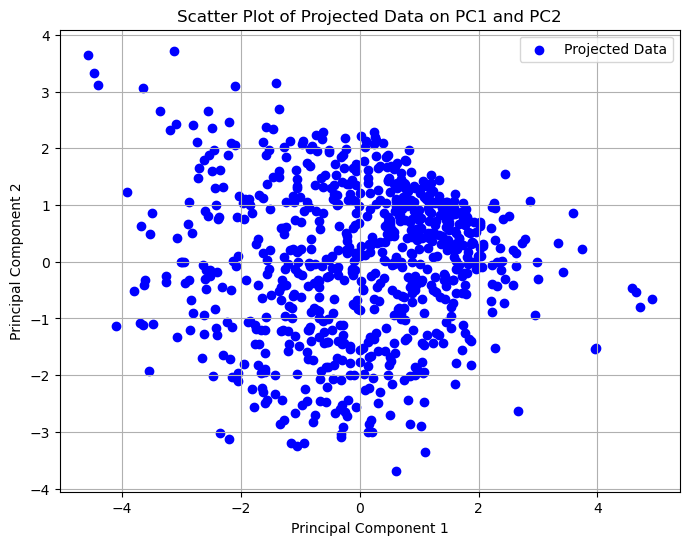

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
#standardizing and transforming data
scaler = StandardScaler()
diabetes_std = scaler.fit_transform(diabetes)
#creating a PCA instance
pca = PCA()
#fiting PCA model to the standardized data
pca.fit(diabetes_std)
#projecting the data onto the principal components
projected_data = pca.transform(diabetes_std)
#results stored in a df for plotting
PCs = pca.components_
PCs_df = pd.DataFrame(data=PCs, columns=diabetes.columns)
#----------------------------plotting first two PCs on data--------------------------------------
# Extract the first and second principal components
PC1 = projected_data[:, 0]
PC2 = projected_data[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(PC1, PC2, c='b', marker='o', label='Projected Data')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend if needed
plt.legend(loc='best')

# Add a title if desired
plt.title('Scatter Plot of Projected Data on PC1 and PC2')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
#***************************************************TASK3***************************************************

In [ ]:
#Q1

In [30]:
start_time = time.time()
# Load the dataset
publications = pd.read_csv('publications.csv', encoding='ISO-8859-1')

# Initialize similarity measures
levenshtein = Levenshtein()
jaro = Jaro()
affine = Affine()

# Create an empty list to store the duplicate record pairs
duplicate_records = []

# Iterate through the records to perform pairwise comparison
for i in range(len(publications)):
    for j in range(i + 1, len(publications)):
        # Calculate Levenshtein similarity for titles
        st = levenshtein.get_sim_score(publications.loc[i, 'title'], publications.loc[j, 'title'])

        # Calculate Jaro similarity for authors
        publications['authors'] = publications['authors'].astype(str)
        sa = jaro.get_sim_score(publications.loc[i, 'authors'], publications.loc[j, 'authors'])

        # Calculate Affine similarity for the conference (venue)
        publications['venue'] = publications['venue'].astype(str)
        sc = affine.get_raw_score(publications.loc[i, 'venue'], publications.loc[j, 'venue'])

        # Calculate Match/Mismatch similarity for the year
        sy = 1 if publications.loc[i, 'year'] == publications.loc[j, 'year'] else 0

        # Combine the scores using the specified formula
        rec_sim = 0.5 * st + 0.2 * sa + 0.2 * sc + 0.1 * sy

        # Check if the similarity exceeds the threshold (0.7)
        if rec_sim > 0.7:
            duplicate_records.append((publications.loc[i, 'id'], publications.loc[j, 'id']))

# Load the actual mappings (ground truth) from "pub_mappings.csv"
actual_mappings = pd.read_csv('pub_mappings.csv', encoding='ISO-8859-1')

# Calculate accuracy by comparing the discovered duplicate records with the actual mappings
correct_duplicates = sum((str(pair[0]), str(pair[1])) in actual_mappings.values for pair in duplicate_records)
accuracy = (correct_duplicates / len(actual_mappings))*100

end_time = time.time()
elapsed_time = end_time - start_time

# Print the results
print('Duplicate records found:', duplicate_records)
print('Accuracy: ', accuracy,'%')
print(f"Elapsed time: {elapsed_time} seconds")

Duplicate records found: 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
# Increase the IOPub data rate limit to a higher value (e.g., 10 MB/s)
import IPython
IPython.get_ipython().config.Application.log_level = 30

# here i tried to increase the capacity but it still couldn't print out the results.
# I run the code 2 times. The first time it took 1h19min and the second time it took 1h5mins
# The times i read from the colab screen not such as in the screen print below